# Sixty Six

`./pear` = simple data

`./scale` = scale factor

`./sixtysix` = ???
 
66 = 2 * 3 * 11, so we have 3 files, but now what?

# Data exploration

I'm running out of time, so I'll just do some basic data exploration.

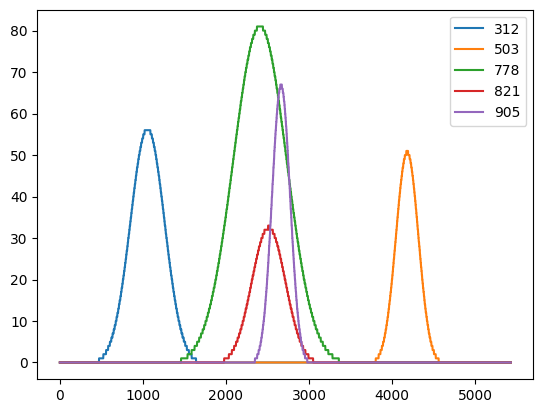

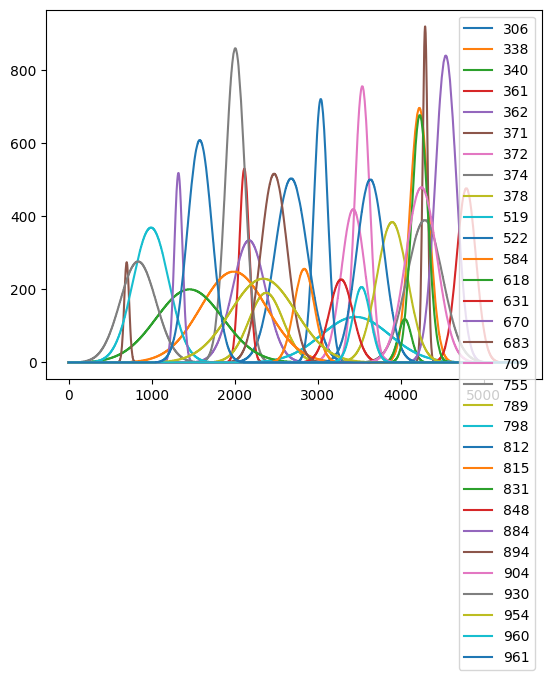

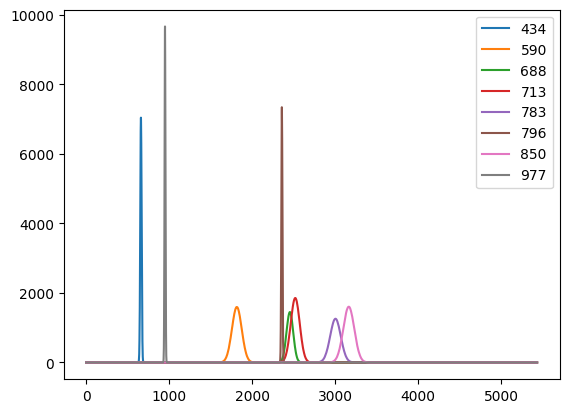

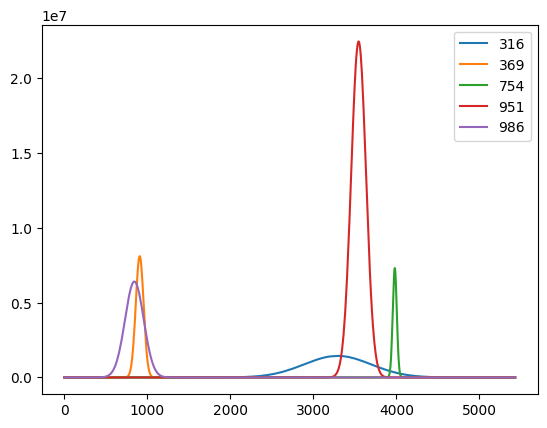

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
csv_df = pd.read_csv('./sixtysix/sample/sixtysix.csv')

# Define the groups based on the max value of the columns
groups = {100: [], 1000: [], 10000: [], 100000: [], 1000000: [], 10000000: []}

# Group columns based on their max value
for col in csv_df.columns[1:]:
    max_val = csv_df[col].max()
    if max_val <= 100:
        groups[100].append(col)
    elif max_val <= 1000:
        groups[1000].append(col)
    elif max_val <= 10000:
        groups[10000].append(col)
    elif max_val <= 100000:
        groups[100000].append(col)
    elif max_val <= 1000000:
        groups[1000000].append(col)
    else:
        groups[10000000].append(col)

# Plot the graphs for each group on the same plot, skip if group is empty
for group in groups.values():
    if len(group) == 0:
        continue
    csv_df[group].plot()
    plt.show()



## Display the hex values of the files, unconventionally 

set 0 to | to make it easier to spot the non-zero values

In [72]:
import os


def display_hex(file_path, columns_per_row=16):
    if not os.path.isfile(file_path):
        print(f"File {file_path} does not exist.")
        return

    with open(file_path, 'rb') as file:
        byte = file.read(1)
        count = 0
        ascii_str = ''
        while byte:
            if count % columns_per_row == 0:
                if count != 0:
                    print(f"  {ascii_str}")
                print(f"{count:08x}  ", end="")
                ascii_str = ''
            hex_value = f"{int.from_bytes(byte, 'big'):02x}"
            if hex_value == "00":
                print("|| ", end="")
                ascii_str += '.'
            else:
                print(f"{hex_value} ", end="")
                ascii_str += chr(
                    int.from_bytes(byte, 'big')) if 32 <= int.from_bytes(byte,
                                                                         'big') <= 126 else '.'
            byte = file.read(1)
            count += 1
        print(f"  {ascii_str}")


In [73]:
display_hex('./sixtysix/sample/sixtysix.A', 10)

00000000  || || 61 2c || || || || || ||   ..a,......
0000000a  || 03 fe ca || || || 0b || ||   ..........
00000014  || || ab ae || || || 16 || ||   ..........
0000001e  || || || a2 || || || 21 || ||   .......!..
00000028  || 04 65 24 || || || 2c || ||   ..e$...,..
00000032  || 01 20 06 || || || 37 || ||   .. ....7..
0000003c  || 02 8b 7e || || || 42 || ||   ...~...B..
00000046  || || a9 8c || || || 4d || ||   .......M..
00000050  || 02 ac d2 || || || 58 || ||   .......X..
0000005a  || 01 77 96 || || || 63 || ||   ..w....c..
00000064  || 01 41 96 || || || 6e || ||   ..A....n..
0000006e  || 02 a7 98 || || || 79 || ||   .......y..
00000078  || 02 db 28 || || || 84 || ||   ...(......
00000082  || || 5e 62 || || || 8f || ||   ..^b......
0000008c  || 02 43 1e || || || 9a || ||   ..C.......
00000096  || 03 94 62 || || || a5 || ||   ...b......
000000a0  || 04 7a cc || || || b0 || ||   ..z.......
000000aa  || 01 88 58 || || || bb || ||   ...X......
000000b4  || 04 62 f6 || || || c6 || ||   ..b.

In [60]:
display_hex('./sixtysix/sample/sixtysix.B', 6)

00000000  32 01 1f || || || 
00000006  3c 01 7d 80 14 || 
0000000c  74 01 35 || || || 
00000012  07 02 5d || || || 
00000018  0a 02 45 01 || || 
0000001e  48 02 03 || || || 
00000024  0a 03 06 || || || 
0000002a  0f 03 7c || || || 
00000030  2c 03 05 || || || 
00000036  2f 03 0c || || || 
0000003c  50 03 8b || || || 
00000042  52 03 e7 05 || || 
00000048  b7 03 05 03 || || 
0000004e  ba 03 1d || || || 
00000054  3c 01 ac 83 07 || 
0000005a  52 01 08 || || || 
00000060  54 01 0e || || || 
00000066  74 01 02 || || || 
0000006c  f7 01 04 || || || 
00000072  07 02 48 || || || 
00000078  f2 02 e1 0c || || 
0000007e  f3 02 42 || || || 
00000084  15 03 7f 01 || || 
0000008a  2c 03 a0 || || || 
00000090  3f 03 01 || || || 
00000096  88 03 49 || || || 
0000009c  b7 03 e7 3f || || 
000000a2  3c 01 bd || || || 
000000a8  77 02 5a || || || 
000000ae  9e 02 01 || || || 
000000b4  f3 02 01 || || || 
000000ba  6a 02 01 || || || 
000000c0  a2 03 05 || || || 
000000c6  da 03 02 || || || 
000000cc  32 0

In [74]:
display_hex('./sixtysix/sample/sixtysix.C', 3)

00000000  1f 8b 08   ...
00000003  || 42 ba   .B.
00000006  75 66 02   uf.
00000009  ff ed ca   ...
0000000c  b1 0d 80   ...
0000000f  20 10 ||    ..
00000012  c0 55 7e   .U~
00000015  02 c7 30   ..0
00000018  a1 b1 c2   ...
0000001b  11 50 48   .PH
0000001e  88 26 a2   .&.
00000021  fb eb 18   ...
00000024  16 d7 5d   ..]
00000027  71 b9 96   q..
0000002a  ab 44 1a   .D.
0000002d  b1 9c 77   ..w
00000030  6d c7 1e   m..
00000033  eb 28 db   .(.
00000036  d3 23 1d   .#.
00000039  91 6b 1b   .k.
0000003c  31 b7 5e   1.^
0000003f  a6 8f 96   ...
00000042  65 59 96   eY.
00000045  65 59 96   eY.
00000048  65 59 96   eY.
0000004b  65 59 96   eY.
0000004e  65 59 96   eY.
00000051  65 59 96   eY.
00000054  65 59 96   eY.
00000057  65 59 96   eY.
0000005a  65 59 96   eY.
0000005d  65 59 96   eY.
00000060  65 59 96   eY.
00000063  65 59 96   eY.
00000066  65 59 96   eY.
00000069  65 59 96   eY.
0000006c  65 59 96   eY.
0000006f  65 59 96   eY.
00000072  65 59 96   eY.
00000075  65 59 96   eY.


In [61]:
import struct


def float_to_hex(f):
    print(hex(struct.unpack('<I', struct.pack('<f', f))[0]))


float_to_hex(0.0206)  # first non-zeros

0x3ca8c155


## Guessing

A look like a look up table, while C are basically repeating itself, beside header.

In [81]:
# if we assume the data is float32, then the file size should be
print(csv_df.size * 4)  # 4 bytes per float32

# check A + B + C
os.path.getsize('./sixtysix/sample/sixtysix.A') + os.path.getsize(
    './sixtysix/sample/sixtysix.B') + os.path.getsize(
    './sixtysix/sample/sixtysix.C')

1086400


368892

# Compressed file?

In [83]:
# count non-zero values
print(csv_df.astype(bool).sum().sum())

56006
